In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_csv("student_habits_performance.csv")
df_usage = df_original.copy()

In [3]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df_usage.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df_usage.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df_usage["gender"].value_counts()

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

In [7]:
df_usage = df_usage.dropna()

In [8]:
df_usage.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [9]:
df_usage = df_usage.drop(["student_id"],axis=1)

### EDA

In [10]:
df_usage.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### Average Exam Score by Group

gender
Female    69.978522
Male      68.970227
Other     71.688889
Name: exam_score, dtype: float64


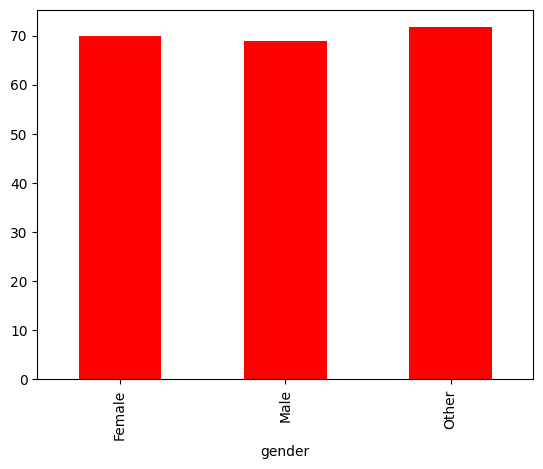

In [15]:
avg_examscorebygender = df_usage.groupby('gender')["exam_score"].mean()
print(avg_examscorebygender)
avg_examscorebygender.plot(kind="bar",color="red");

diet_quality
Fair    70.231061
Good    69.395677
Poor    68.292771
Name: exam_score, dtype: float64


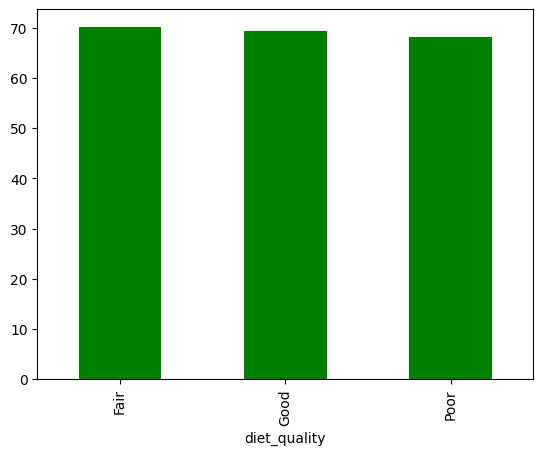

In [16]:
avg_examscorebydiet = df_usage.groupby("diet_quality")["exam_score"].mean()
print(avg_examscorebydiet)
avg_examscorebydiet.plot(kind="bar",color="green");

part_time_job
No     69.708275
Yes    69.012245
Name: exam_score, dtype: float64


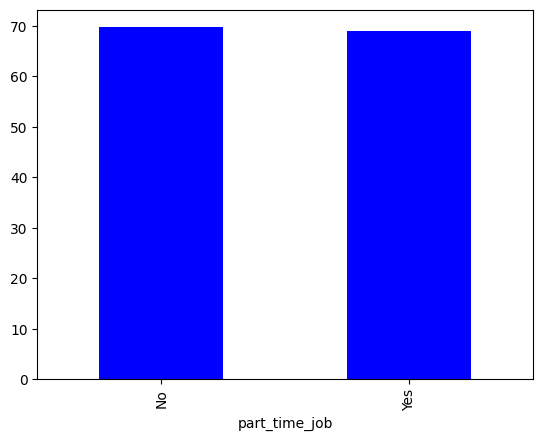

In [17]:
avg_examscorebypartjob = df_usage.groupby("part_time_job")["exam_score"].mean()
print(avg_examscorebypartjob)
avg_examscorebypartjob.plot(kind="bar",color="blue");

extracurricular_participation
No     69.518387
Yes    69.643599
Name: exam_score, dtype: float64


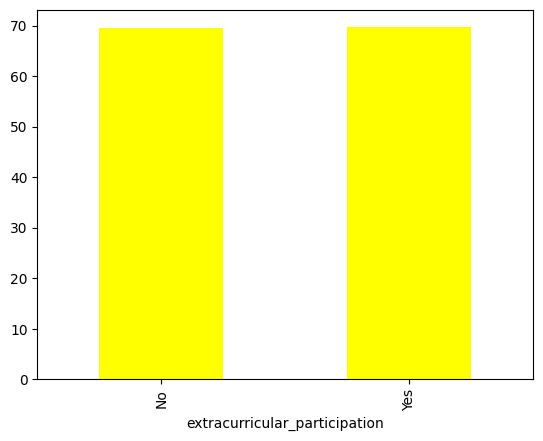

In [18]:
avg_examscore_extracurricular_participation = df_usage.groupby("extracurricular_participation")["exam_score"].mean()
print(avg_examscore_extracurricular_participation)
avg_examscore_extracurricular_participation.plot(kind="bar",color="yellow");

### study_hours_per_day vs exam_score

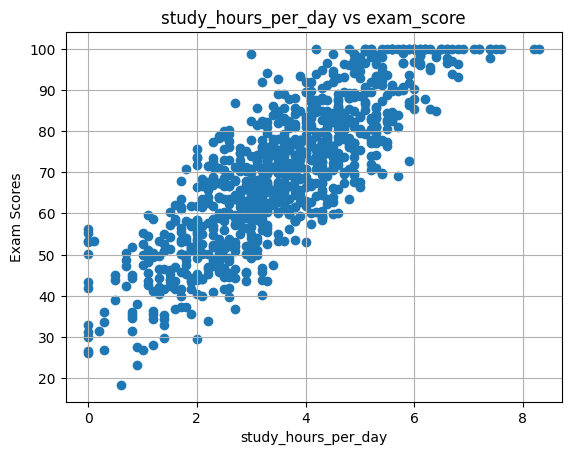

In [25]:
plt.scatter(df_usage["study_hours_per_day"],df_usage["exam_score"]);
plt.xlabel("study_hours_per_day")
plt.ylabel("Exam Scores")
plt.title("study_hours_per_day vs exam_score")
plt.grid(True)

### sleep_hours vs mental_health_rating

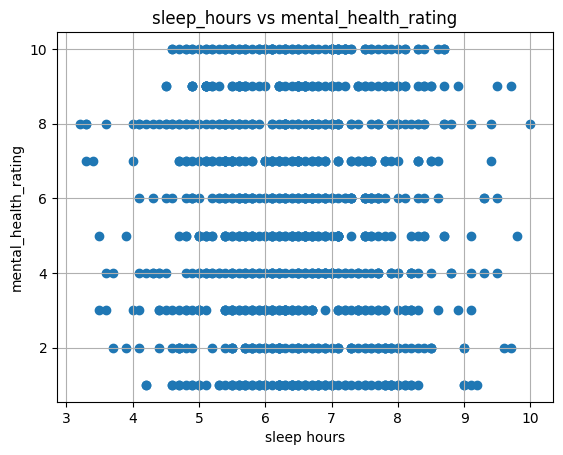

In [28]:
plt.scatter(df_usage["sleep_hours"],df_usage["mental_health_rating"]);
plt.xlabel("sleep hours")
plt.ylabel("mental_health_rating")
plt.title("sleep_hours vs mental_health_rating")
plt.grid(True)

In [30]:
df_usage[['sleep_hours', 'mental_health_rating']].corr()

,sleep_hours,mental_health_rating
sleep_hours,1.000000,-0.010653
mental_health_rating,-0.010653,1.000000


### Impact of Categorical Data

Text(0.5, 1.0, 'part time job vs exam scores')

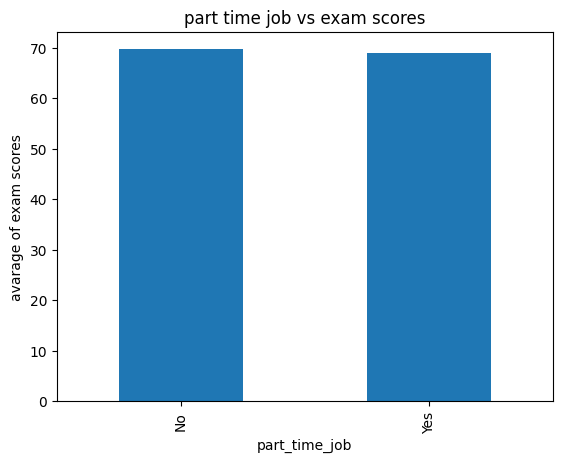

In [32]:
df_usage.groupby("part_time_job")["exam_score"].mean().plot(kind="bar");
plt.ylabel("avarage of exam scores")
plt.title("part time job vs exam scores")

Text(0.5, 1.0, 'extracurricular participation vs exam scores')

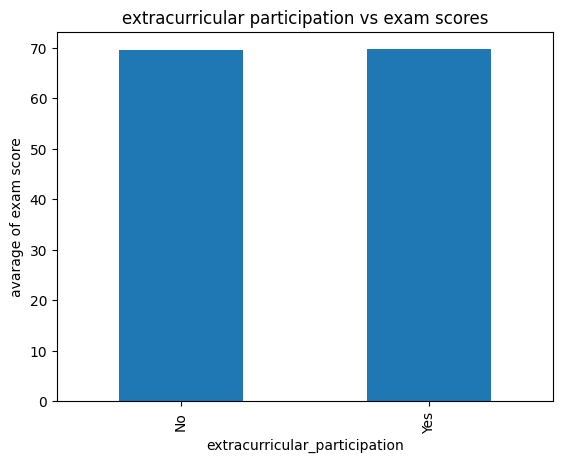

In [33]:
df_usage.groupby("extracurricular_participation")["exam_score"].mean().plot(kind="bar");
plt.ylabel("avarage of exam score")
plt.title("extracurricular participation vs exam scores")

Text(0.5, 1.0, 'diet_quality vs exam score')

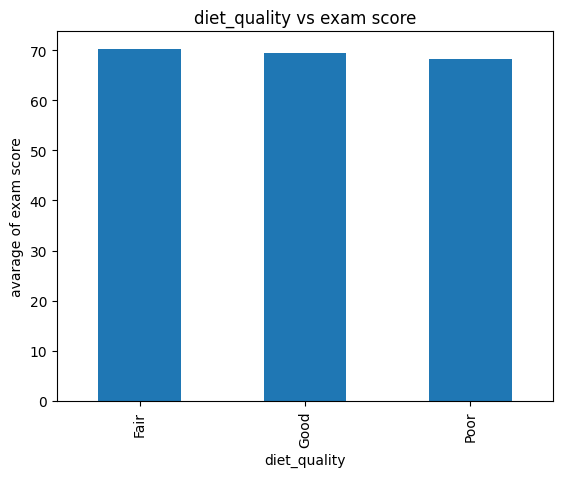

In [34]:
df_usage.groupby("diet_quality")["exam_score"].mean().plot(kind="bar");
plt.ylabel("avarage of exam score")
plt.title("diet_quality vs exam score")

## Machine Learning Section

#### Objective: To create a model that predicts a student's exam score.

In [35]:
df_usage.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### x values are: age, gender,study_hours_per_day,	social_media_hours	,netflix_hours	,part_time_job	,attendance_percentage	sleep_hours	diet_quality	,exercise_frequency,	parental_education_level,	internet_quality,	mental_health_rating	extracurricular_participation	
#### y values is : exam_score (to predict)

In [40]:
# using labelencoding to contever categorical vulues to numerical values
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 
                    'parental_education_level', 'internet_quality', 
                    'extracurricular_participation']
le = LabelEncoder()
for col in categorical_cols:
      df_usage[col + '_encoded'] = le.fit_transform(df_usage[col])

# Checking         
df_usage[['gender', 'gender_encoded']].head()

,gender,gender_encoded
0,Female,0
1,Female,0
2,Male,1
3,Female,0
4,Female,0


In [43]:
from sklearn.model_selection import train_test_split
x = df_usage[['age',            
           'study_hours_per_day',
           'social_media_hours',
           'netflix_hours',
           'attendance_percentage',
           'sleep_hours', 
           'exercise_frequency',
           'mental_health_rating',
      ]]
y = df_usage["exam_score"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(x_test)
print("R² skoru:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² skoru: 0.8896640130378486
RMSE: 29.948832572523244


### Classification for part time job

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = df_usage[['age',            
           'study_hours_per_day',
           'social_media_hours',
           'netflix_hours',
           'attendance_percentage',
           'sleep_hours', 
           'exercise_frequency',
           'mental_health_rating',
      ]]
y = df_usage["part_time_job"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rfc  = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

y_pred = rfc.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   0]
 [ 50   0]]
              precision    recall  f1-score   support

          No       0.73      1.00      0.84       132
         Yes       0.00      0.00      0.00        50

    accuracy                           0.73       182
   macro avg       0.36      0.50      0.42       182
weighted avg       0.53      0.73      0.61       182

